# Introduction to Time Series Analysis in Python - Part 2

In [1]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from math import sqrt

## Some Simple Time Series

### Taxing Exercise: Compute the ACF (Autocorrelation Function)
In the last chapter, you computed autocorrelations with one lag. Often we are interested in seeing the autocorrelation over many lags. The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs in the quarter that taxes are due.

In [2]:
HRB = pd.read_csv('../datasets/stock/HRB.csv')
HRB.head()

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07
3,2007Q4,1.85
4,2008Q1,-0.34


In [3]:
HRB.Quarter = pd.to_datetime(HRB.Quarter)
HRB.head()

,Quarter,Earnings
0,2007-01-01,-0.36
1,2007-04-01,-0.38
2,2007-07-01,0.07
3,2007-10-01,1.85
4,2008-01-01,-0.34


In [4]:
HRB.set_index('Quarter', inplace=True)
HRB.head()

,Earnings
Quarter,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


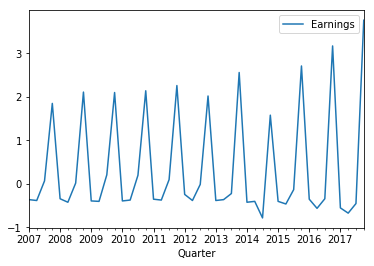

In [5]:
HRB.plot()
plt.show()

In [6]:
# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


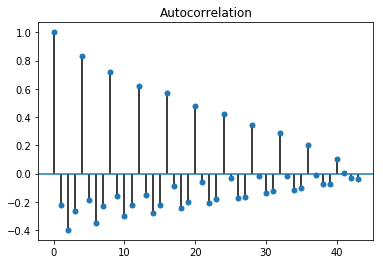

In [7]:
# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

### Are We Confident This Stock is Mean Reverting?
In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. That autocorrelation seems large, but is it statistically significant? In other words, can you say that there is less than a 5% chance that we would observe such a large negative autocorrelation if the true autocorrelation were really zero? And are there any autocorrelations at other lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of returns you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation of the sample autocorrelation is 1/N‾‾√ where N is the number of observations, so if N=100, for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean, the 95% confidence interval is ±1.96/N‾‾√. This approximation only holds when the true autocorrelations are all zero.

You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of -0.16 from the last chapter.

In [8]:
MSFT = pd.read_csv('../datasets/stock/MSFT.csv', index_col=0)
MSFT.index = pd.to_datetime(MSFT.index)
MSFT.head()

,Adj Close
Date,
2012-08-06,26.107651
2012-08-07,26.377876
2012-08-08,26.438896
2012-08-09,26.587088
2012-08-10,26.517351


In [9]:
MSFT = MSFT.resample(rule='W', how='last')
MSFT.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [10]:
MSFT = MSFT.pct_change()
MSFT.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [11]:
MSFT.dropna(inplace=True)

In [12]:
# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = MSFT['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly MSFT returns is -0.16


In [13]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(MSFT)

In [14]:
# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

The approximate confidence interval is +/- 0.12


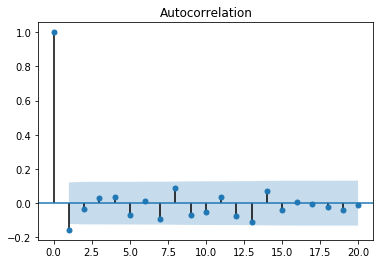

In [15]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(MSFT, alpha=0.05, lags=20)
plt.show()

### Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modelled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

In [16]:
# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

In [17]:
# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

The mean is 0.021 and the standard deviation is 0.051


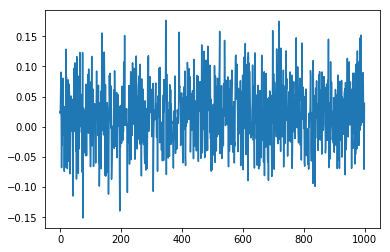

In [18]:
# Plot returns series
plt.plot(returns)
plt.show()

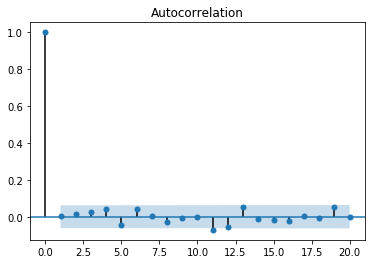

In [19]:
# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

### Generate a Random Walk
Whereas stock returns are often modelled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

In [20]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

In [21]:
# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

In [22]:
# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

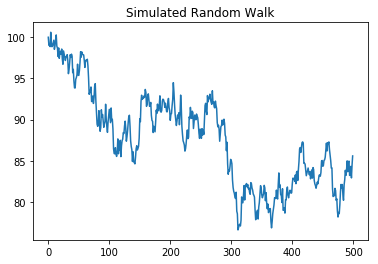

In [23]:
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

### Get the Drift
* You will look at a random walk with a drift. Many time series, like stock prices, are random walks but tend to drift up over time.
* In the last exercise, the noise in the random walk was additive: random, normal changes in price were added to the last price. However, when adding noise, you could theoretically get negative prices. Now you will make the noise multiplicative: you will add one to the random, normal changes to get a total return, and multiply that by the last price.

In [24]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

In [25]:
# Set first element to 1
steps[0]=1

In [26]:
# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

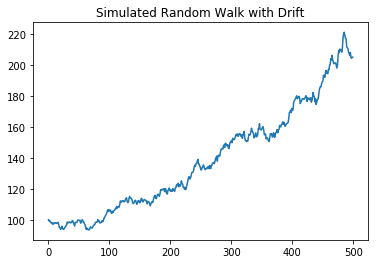

In [27]:
# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

### Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift).

With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) is that the series follows a random walk. Therefore, a low p-value (say less than 5%) means we can reject the null hypothesis that the series is a random walk.

In [28]:
AMZN = pd.read_csv('../datasets/stock/AMZN.csv', index_col=0)
AMZN.head()

,Adj Close
Date,
5/15/1997,1.958333
5/16/1997,1.729167
5/19/1997,1.708333
5/20/1997,1.635417
5/21/1997,1.427083


In [29]:
AMZN.index = pd.to_datetime(AMZN.index)
AMZN.head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [30]:
# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

(4.0251685257707379, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.8621120497269161, '10%': -2.5670745025321304}, 30308.642164269811)


In [31]:
# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

The p-value of the test on prices is: 1.0


p-value equals 1.0 so Amazon Stock Prices is Random Walk

In [32]:
print('ADF statistic: ' + str(results[0]))
print('Critical values of the test statistic: ' + str(results[4]))
print('Number of observations: ' + str(results[3]))

ADF statistic: 4.02516852577
Critical values of the test statistic: {'1%': -3.4316445438146865, '5%': -2.8621120497269161, '10%': -2.5670745025321304}
Number of observations: 5054


### How About Stock Returns?
In the last exercise, you showed that Amazon stock prices, contained in the DataFrame AMZN follow a random walk. In this exercise. you will do the same thing for Amazon returns (percent change in prices) and show that the returns do not follow a random walk.

In [33]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()
AMZN_ret.head()

,Adj Close
Date,
1997-05-15,NaN
1997-05-16,-0.117021
1997-05-19,-0.012049
1997-05-20,-0.042683
1997-05-21,-0.127389


In [34]:
# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()
AMZN_ret.head()

,Adj Close
Date,
1997-05-16,-0.117021
1997-05-19,-0.012049
1997-05-20,-0.042683
1997-05-21,-0.127389
1997-05-22,-0.021898


In [35]:
# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.56558980835e-22


In [36]:
results

(-12.053453021869625,
 2.5655898083490064e-22,
 33,
 5053,
 {'1%': -3.4316448001381268,
  '10%': -2.5670745628156308,
  '5%': -2.8621121629697699},
 -18483.377508750207)

### Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing the seasonal component of a time series is called seasonal adjustment. For example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,..., because of the spike in earnings every four quarters during tax season. Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). Then compute the autocorrelation of the transformed series.

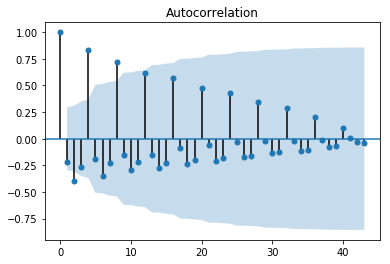

In [44]:
# Plot the autocorrelation function
plot_acf(HRB)
plt.show()

In [40]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)
HRBsa.head()

,Earnings
Quarter,
2007-01-01,NaN
2007-04-01,NaN
2007-07-01,NaN
2007-10-01,NaN
2008-01-01,0.02


In [42]:
# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()
HRBsa.head()

,Earnings
Quarter,
2008-01-01,0.02
2008-04-01,-0.04
2008-07-01,-0.05
2008-10-01,0.26
2009-01-01,-0.05


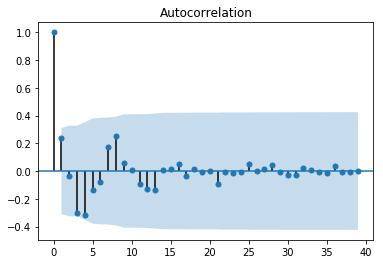

In [43]:
# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()